## Resumo aula 5 de Machine Learning ##

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, ElasticNet
from sklearn.metrics import f1_score, accuracy_score, precision_score, make_scorer, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

In [8]:
cancer = pd.read_csv('../datasets/data.csv')
cancer.drop(columns=['Unnamed: 32','id'], axis=1, inplace=True)
cancer_raw = cancer
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


[[105   2]
 [  2  62]]


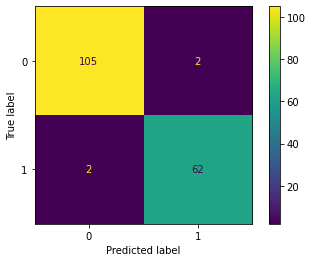

In [3]:
y = cancer['diagnosis']
X = cancer.select_dtypes(include='number')

# primeiro passo é separar o target, e dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# criar uma lista de tuplas contendo as etapas do pipeline

lista_etapas = [('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=5))]

# criando o modelo a partir dos dados de treino

pipe = Pipeline(steps=lista_etapas).fit(X_train,y_train)

# verificando o desempenho do modelo utilizando os dados de teste, lembrando que como é uma aprendizagem supervisionada, 
# temos o y_test que verifica os acertos do target y_predict( o que foi previsto, bate com o que o modelo encontrou? )

y_predict = pipe.predict(X_test)

# em seguida podemos verificar o desempenho com uma matriz de confusão passando os dados de y_predit(o que o modelo encontrou?) e y_test(o que é de fato)

cm = confusion_matrix(y_test, y_predict)
print(cm)
matriz = ConfusionMatrixDisplay(confusion_matrix=cm)
matriz.plot()

In [4]:
X = cancer.drop(columns='diagnosis')
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

steps = [('std_scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]


pipe = Pipeline(steps=steps)

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label='M')
cv = cross_validate(estimator=pipe, X=X_train, y=y_train, cv=kf5, return_train_score=True )

pd.DataFrame(cv)

,fit_time,score_time,test_score,train_score
0,0.010000,0.025000,0.978022,0.978022
1,0.009000,0.010001,0.978022,0.969780
2,0.005999,0.008000,0.967033,0.972527
3,0.007000,0.007998,0.945055,0.972527
4,0.007000,0.008000,0.934066,0.980769


## Exercício 1

1 - Faça a leitura do dataset House Prices e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Chame o cross_validate

7 - avalie os resultados

In [7]:
house_data = pd.read_csv('../datasets/usa_housing.csv')

house_raw = house_data

house_data = house_data.drop(columns='Address')

X = house_data.drop(columns='Price')
y = house_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
steps = [('std_scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
kf5 = KFold(n_splits=10)
pipe = Pipeline(steps=steps)
metric = {'neg_mean_absolute_error':make_scorer(mean_absolute_error),
          'r2':make_scorer(r2_score), 
          'neg_mean_squared_error':make_scorer(mean_squared_error)}

cv = cross_validate(estimator=pipe, X=X_train, y=y_train, cv=kf5,scoring=metric, return_train_score=True)

result = pd.DataFrame(cv)
result.describe()

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,0.004800,0.002300,123030.771250,122943.567290,0.811376,0.812122,2.353027e+10,2.349169e+10
std,0.001398,0.000825,5435.822062,309.398699,0.010055,0.001539,1.627238e+09,7.965337e+07
min,0.002999,0.000998,117019.655805,122414.935606,0.799770,0.810087,2.177606e+10,2.334205e+10
25%,0.004251,0.001998,118210.216762,122914.347391,0.801788,0.811020,2.253858e+10,2.345849e+10
50%,0.004999,0.002502,121528.272299,122959.955969,0.811723,0.811850,2.322227e+10,2.349890e+10
75%,0.005002,0.003002,127024.468864,123157.838129,0.817360,0.813304,2.362966e+10,2.351534e+10
max,0.007997,0.003002,131386.879522,123351.449835,0.830584,0.814834,2.638904e+10,2.364029e+10


### Gridsearch

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisa fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

## Exercício 2

1 - Faça a leitura do dataset insurance e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados

In [9]:
df = pd.read_csv("../datasets/insurance.csv")

df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)
df['is_smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

X = df.drop(['charges', 'target', 'sex', 'smoker', 'region'], axis = 1)
y = df["target"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(2, 21)}

grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 20 folds for each of 114 candidates, totalling 2280 fits
[CV 1/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.889 total time=   0.0s
[CV 2/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 3/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.889 total time=   0.0s
[CV 4/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/20; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.870 total time=   0.0s
[CV 5/20; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/20; 1/114] END knn__me

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score), verbose=10)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       143
           1       0.89      0.76      0.82        93
           2       0.97      0.88      0.92        32

    accuracy                           0.88       268
   macro avg       0.90      0.87      0.88       268
weighted avg       0.88      0.88      0.88       268


# ====================

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       569
           1       0.92      0.82      0.87       371
           2       0.97      0.88      0.92       130

    accuracy                           0.91      1070
   macro avg       0.93      0.89      0.91      1070
weighted avg       0.91      0.91      0.91      1070



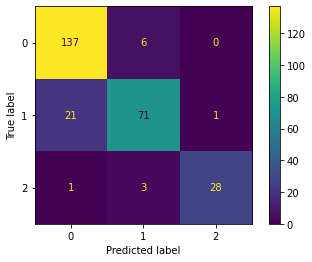

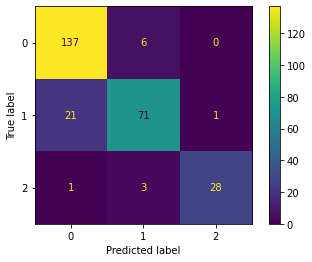

In [25]:
## Resultado ficou bastante semelhante, melhorando em 1 único caso.
## Algumas hipóteses do motivo: 1 - condições não identicas as da estimativa anterior (quando estava pior antes da
## adição da distância de minkowski)
## 2 - Azar na divisão dos folds, este podemos validar variando o numero de folds ou o shuffle (mude o random_state)

y_pred_test = grid_knn.predict(X_test)
print(classification_report(y_test, y_pred_test))
cm1 = confusion_matrix(y_test, y_pred_test)
display1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
display1.plot()



print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(classification_report(y_train, y_pred_train))
cm2 = confusion_matrix(y_test, y_pred_test)
display2 = ConfusionMatrixDisplay(confusion_matrix=cm1)
display2.plot()



## Exercício 3

Fazer a regressão do exercício 1 (usa_housing) utilizando o KNN com GridSearch

Passo a passo
1 - Faça a leitura do dataset e escolha as features (relembre da resolução do exercicio em aula)

2 - Efetue o train test split

3 - Defina as etapas do pipeline, aqui o estimador deve ser o KNeighborsRegressor

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados

In [ ]:
data = pd.read_csv('usa_housing.csv')

data_raw = data
data = data.drop(columns='Address')

In [ ]:
X = data.drop(columns='Price')
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsRegressor()
steps = [('std_scaler', StandardScaler()),
         ('knn_regressor', KNeighborsRegressor())]

metric = 'r2'

parameters = {'knn_regressor__n_neighbors':range(2,10,1),
              'knn_regressor__weights':['uniform','distance'],
              'knn_regressor__leaf_size':range(1,10,1),
              'knn_regressor__metric': ['euclidean','minkowski']}

kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
pipe = Pipeline(steps=steps)

model = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=metric, cv=kf5)

model.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             param_grid={'knn_regressor__leaf_size': range(1, 10),
                         'knn_regressor__metric': ['euclidean', 'minkowski'],
                         'knn_regressor__n_neighbors': range(2, 10),
                         'knn_regressor__weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
model.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn_regressor',
                 KNeighborsRegressor(leaf_size=1, metric='euclidean',
                                     n_neighbors=9, weights='distance'))])

In [ ]:
model.predict(x_test)

array([1306960.85983854, 1269671.79424814, 1210570.91076809, ...,
       1416877.55344677, 1465093.29058585, 1099668.48740405])